# **EfficientNet**

## **1. Overall introduction:**

Mạng Nơ-ron tích chập (Convolutional Neural Networks - ConvNets) thường được phát triển với ngân sách tài nguyên cố định và sau đó được thu phóng để có độ chính xác tốt hơn nếu có nhiều tài nguyên hơn

Việc cân bằng một cách có hệ thống độ sâu, chiều rộng, độ phân giải mạng (network depth, width, and resolution) có thể mang đến hiệu suất tốt hơn. Thông thường việc điều chỉnh các hyperparmeters được điều chỉnh thủ công, kết quả dưới mức tối ưu. EfficientNet sử dụng `compound coefficient` (hệ số gộp) để scale up CNNs model có cấu trúc hơn. Không giống cách tiếp cận thông thường là scale các chiều của network như chiều sâu (depth), rộng (width), độ phân giải (resolution) mà scales các chiều theo một tập các `Scaling coefficients` cố định.

Bài báo EfficientNet mục đích:
- Thiết kế simple mobile-size baseline architecture (kiến trúc cơ sở đơn giản): **EfficientNet-B0**
- Cung cấp các **compound scaling** một các hiệu quả giúp tăng kích thước model để đạt độ chính xác cao nhất 

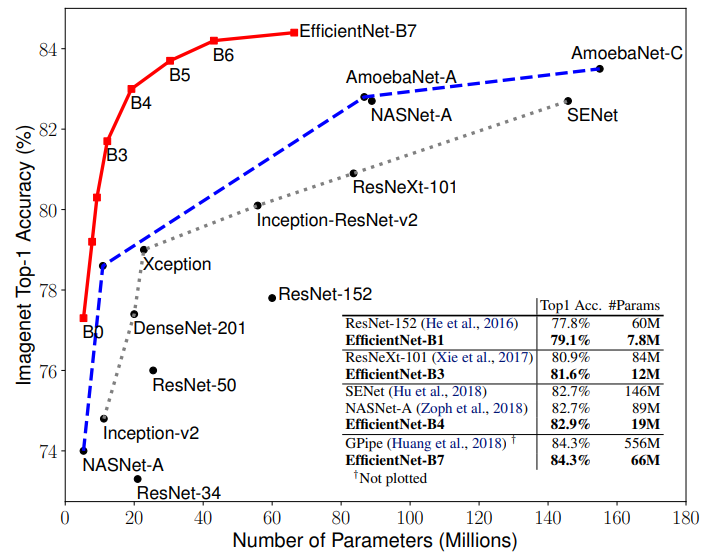

## **2. Scaling mô hình CNN**

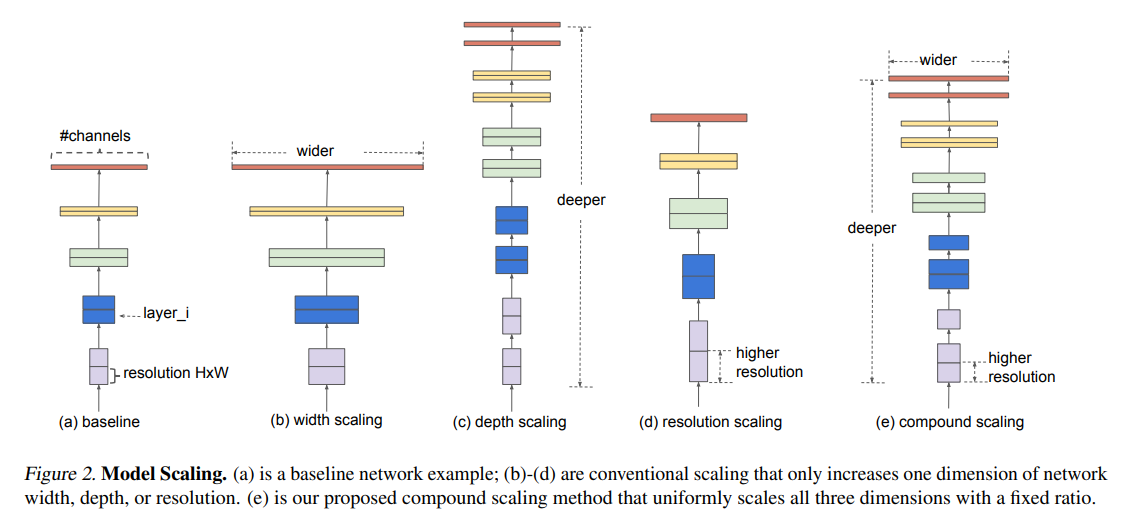

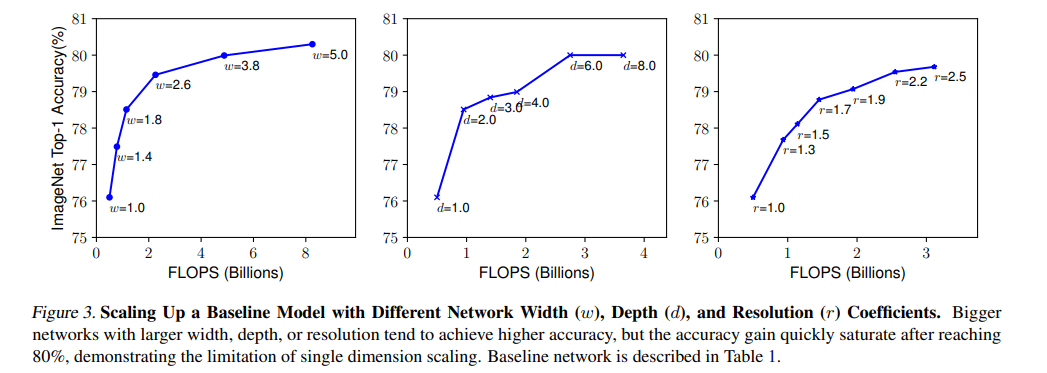

- **Quan sát 1** - mở rộng bất kỳ dimensions nào của network: width, depth, resolution đều cải thiện accuracy, tuy nhiên accuracy sẽ đạt tới bão hòa đối với các model lớn.

- **Quan sát 2** - để có được độ chính xác và hiệu suất tốt hơn điều quan trọng là cân bằng giữa tất cả dimensions (width, depth, resolution) trong quá trình mở rộng ConvNet.

## **3. Compound Modeling Scaling:**

 **Compound scaling method** (phương pháp mở rộng kết hợp) có thể tổng quát hóa các kiến trúc CNN có sẵn như MobileNet và ResNet. Tuy nhiên việc chọn base network (mạng cơ sở) là quan trọng để đạt được kết quả tốt nhất bởi vì phương pháp mở rộng kết hợp chỉ giúp tăng khả năng dự đoán của mạng NN bằng cách tái tạo lại các phép toán và cấu trúc của mạng cơ sở.

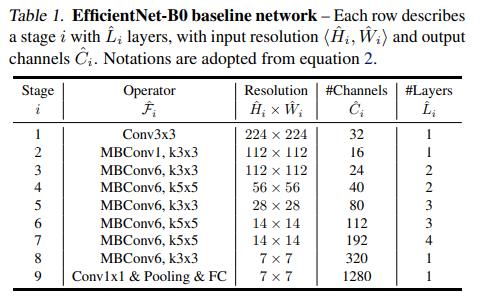

In [1]:
import tensorflow as tf
def inverted_residual_block(x, expand=64, squeeze=16):
    block = tf.keras.layers.Conv2D(expand, (1,1), activation='relu')(x)     # expand layer
    block = tf.keras.layers.DepthwiseConv2D((3,3), activation='relu')(block)
    block = tf.keras.layers.Conv2D(squeeze, (1,1), activation='relu')(block)    # squeeze layer, chỗ này có sử dụng non-linearly activation function
    return tf.keras.layers.Add()([block, x])


### **Compound scaling method**

Conv layer i-th có thể được định nghĩa là một hàm $Y_i = F_i(X_i)$, trong đó $F_i$ là toán toán tử, $Y_i$ là tensor đầu ra, $X_i$ là tensor đầu vào với kích thước là $<H_i,W_i,C_i>, H_i, W_i$ là spatial dimensisons, $C_i$ là số channels. Một ConvNet có thể được định nghĩa bằng danh sách các layer:

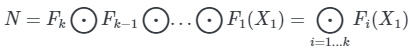

Mạng CNN có thể được coi như việc chồng các convolutional layers lên nhau. Hơn thế nữa các layers này có thể phân chia vào các stages (tầng) khác nhau, ResNet có 5 stages và tất cả các layers trong mỗi stage có chung convolutional type. Do đó mạng CNN có thể được biểu diễn dưới dạng toán học như sau:

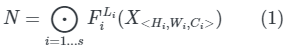

trong đó $N$ miêu tả mạng NN, $i$ biểu diễn số stage (tầng), $F_i$ biểu diễn convolution operation cho i-th stage và $L_i$ biểu diễn số lần $F_i$ được lặp lại trong i-th stage. $H_i, W_i, C_i$ lần lượt miêu tả input tensor shape cho i-th stage.

Từ phương trình (1) $L_i$ kiểm soát độ sâu của mạng, $C_i$ chịu trách nhiệm cho độ rộng của mạng, $H_i$ và $W_i$ ảnh hưởng đến độ phân giải. Việc tìm bộ hệ số tốt để mở rộng các dimensions cho mỗi layer gần như là không thể do không gian tìm kiếm quá lớn. Do đó để giới hạn không gian tìm kiếm nhóm tác giả đã đặt ra một số quy tắc cơ bản:

- Tất cả layers/stages trong mô hình mở rộng sẽ sử dụng cùng convolution operations như mạng cơ sở
- Tất cả layers phải được mở rộng đều với tỉ số không đổi

Với những quy tắc đó, phương trình (1) có thể được tham số hóa như sau:

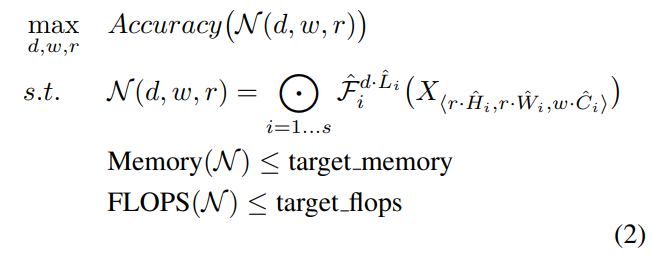

## **4. References:**
- [Paper: EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/pdf/1905.11946.pdf)
- [EfficientNet Understanding blog](https://huytranvan2010.github.io/EfficientNet-Understanding/)
- [Viblo blog: EffcientNet](https://viblo.asia/p/efficientnet-cach-tiep-can-moi-ve-model-scaling-cho-convolutional-neural-networks-Qbq5QQzm5D8)